<a href="https://www.kaggle.com/code/rajarshiacharjee/bank-customer-churn-prediction?scriptVersionId=271048788" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## Bank Customer Churn Prediction
* EDA
* Binary Classifier model
* Hyper-Parameter Tuning

In [1]:
## required libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import os

In [2]:
## importing dataset
df_cc = pd.read_csv('/kaggle/input/bank-customer-churn/Customer-Churn-Records.csv')
df_cc.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


### Data Pre processing

In [3]:
## 5 number summary
df_cc.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


In [4]:
df_cc.isnull().sum()
## the dataset has no null values

RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

In [5]:
df_cc.dtypes
## the data types are also fine

RowNumber               int64
CustomerId              int64
Surname                object
CreditScore             int64
Geography              object
Gender                 object
Age                     int64
Tenure                  int64
Balance               float64
NumOfProducts           int64
HasCrCard               int64
IsActiveMember          int64
EstimatedSalary       float64
Exited                  int64
Complain                int64
Satisfaction Score      int64
Card Type              object
Point Earned            int64
dtype: object

In [6]:
df_cc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

In [7]:
df_cc.duplicated().sum()
## the data contains no duplicates

0

### Data Exploration

#### There are 2 popular ways of exploration - 
* Graphs
* Group by

In [8]:
df_cc.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


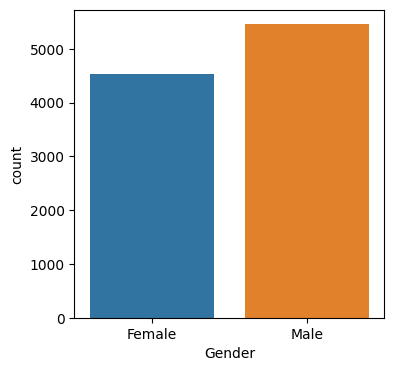

In [9]:
## exploring the gender feature
plt.figure(figsize=(4,4))
sns.countplot(x="Gender",data=df_cc)
plt.show()

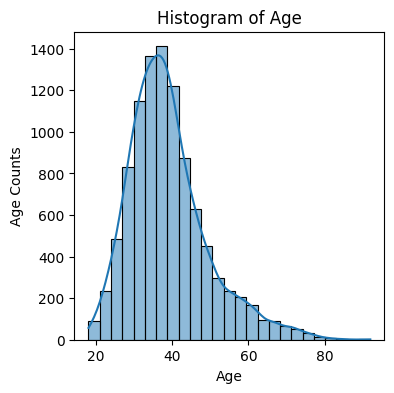

In [10]:
## exploring the age --- kind of Gaussian distribution
import warnings
warnings.filterwarnings("ignore") 
plt.figure(figsize=(4,4))
sns.histplot(x='Age',data=df_cc,kde=True,bins=25)
plt.xlabel('Age')
plt.ylabel('Age Counts')
plt.title('Histogram of Age')
plt.show()

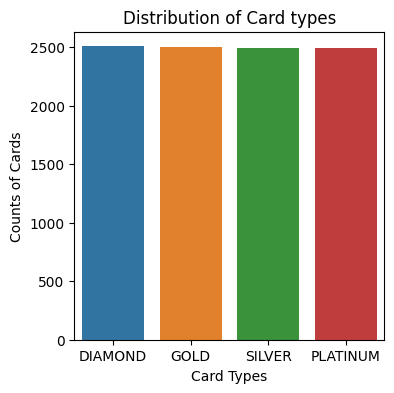

In [11]:
## card types -- eqaul distribution of cards
import warnings
warnings.filterwarnings("ignore") 
plt.figure(figsize=(4,4))
sns.countplot(x='Card Type',data=df_cc)
plt.xlabel('Card Types')
plt.ylabel('Counts of Cards')
plt.title('Distribution of Card types')
plt.show()

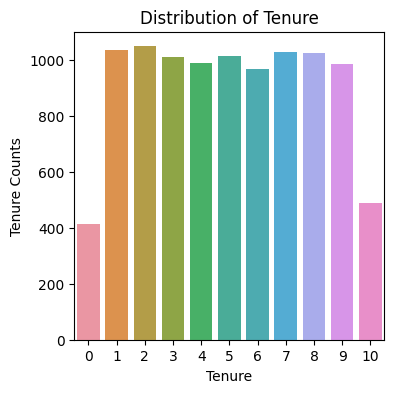

In [12]:
## distribution of tenure -- well tenured customers
import warnings
warnings.filterwarnings("ignore") 
plt.figure(figsize=(4,4))
sns.countplot(x='Tenure',data=df_cc)
plt.xlabel('Tenure')
plt.ylabel('Tenure Counts')
plt.title('Distribution of Tenure')
plt.show()

In [13]:
## removing un necessary features - we observe that row number, geography and even surname will not have any relation that a customer will attrite
df_cc_filtered = df_cc.copy(deep=True)
df_cc_filtered.drop(columns=['Surname','CustomerId','RowNumber','Geography'],inplace=True)
df_cc_filtered.head(5)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,619,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,608,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,502,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,699,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,850,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [14]:
## Label Encoding
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

df_cc_filtered['Gender'] = encoder.fit_transform(df_cc_filtered['Gender'])
df_cc_filtered['Card Type'] = encoder.fit_transform(df_cc_filtered['Card Type'])
df_cc_filtered.head(5)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,619,0,42,2,0.00,1,1,1,101348.88,1,1,2,0,464
1,608,0,41,1,83807.86,1,0,1,112542.58,0,1,3,0,456
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1,3,0,377
3,699,0,39,1,0.00,2,0,0,93826.63,0,0,5,1,350
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,5,1,425


In [15]:
## correlation
df_cc_filtered.corr()

## Exited and complain has a high correlation
## Number of products and isActiveMember has a high correlation

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
CreditScore,1.000000,-0.002857,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.026771,-0.027048,-0.012599,-0.006936,0.000077
Gender,-0.002857,1.000000,-0.027544,0.014733,0.012087,-0.021859,0.005766,0.022544,-0.008112,-0.106267,-0.106287,0.000242,-0.008726,-0.013225
Age,-0.003965,-0.027544,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285296,0.283530,-0.000876,-0.006997,0.002222
Tenure,0.000842,0.014733,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.013656,-0.013047,0.008663,-0.001414,-0.010196
Balance,0.006268,0.012087,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118577,0.119124,-0.002588,-0.027059,0.014608
NumOfProducts,0.012238,-0.021859,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047611,-0.046357,-0.011394,0.020387,-0.015330
HasCrCard,-0.005458,0.005766,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.006976,-0.007095,-0.000212,0.005809,-0.011041
IsActiveMember,0.025651,0.022544,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156356,-0.154741,0.010236,0.016247,-0.004983
EstimatedSalary,-0.001384,-0.008112,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012490,0.012494,-0.013747,0.014295,-0.001515
Exited,-0.026771,-0.106267,0.285296,-0.013656,0.118577,-0.047611,-0.006976,-0.156356,0.012490,1.000000,0.995693,-0.005849,-0.010861,-0.004628


<Axes: >

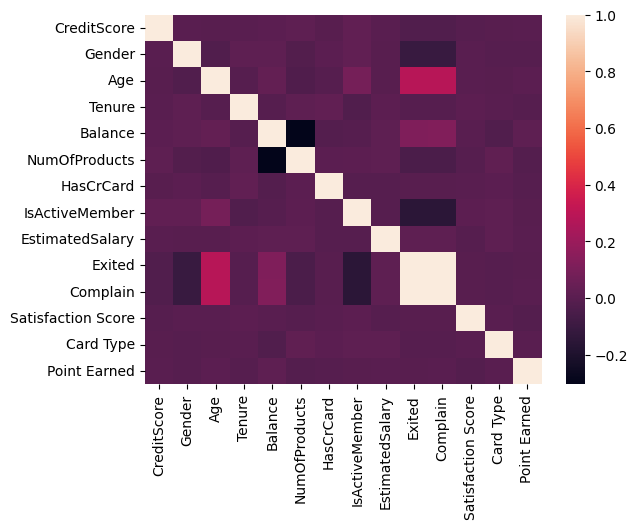

In [16]:
sns.heatmap(df_cc_filtered.corr())

In [17]:
## remove the number of products from the dataframe
df_cc_filtered.drop(columns=['NumOfProducts'],inplace=True)
df_cc_filtered.head()

,CreditScore,Gender,Age,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,619,0,42,2,0.00,1,1,101348.88,1,1,2,0,464
1,608,0,41,1,83807.86,0,1,112542.58,0,1,3,0,456
2,502,0,42,8,159660.80,1,0,113931.57,1,1,3,0,377
3,699,0,39,1,0.00,0,0,93826.63,0,0,5,1,350
4,850,0,43,2,125510.82,1,1,79084.10,0,0,5,1,425


In [18]:
## splitting the dataset
X = df_cc_filtered[['CreditScore','Gender','Age','Tenure','Balance','HasCrCard','IsActiveMember','EstimatedSalary','Complain','Satisfaction Score','Card Type','Point Earned']]
y = df_cc_filtered['Exited']

In [19]:
from sklearn.model_selection import train_test_split

## Train test split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

# scaling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train

array([[-0.34459497, -1.09823226, -0.65674999, ..., -1.42878813,
        -1.34136912,  0.4521261 ],
       [-0.09518109, -1.09823226, -0.46637979, ..., -0.00751246,
        -0.4449888 ,  0.89391073],
       [-0.94734518,  0.91055421, -0.56156489, ..., -0.00751246,
        -1.34136912, -1.72109733],
       ...,
       [ 0.86090545, -1.09823226, -0.08563939, ...,  1.41376322,
         1.34777184,  0.32271443],
       [ 0.15423279,  0.91055421,  0.39028611, ..., -0.00751246,
        -1.34136912,  0.33163938],
       [ 0.46600014,  0.91055421,  1.1517669 , ...,  0.70312538,
        -1.34136912,  0.14867806]])

In [20]:
y.value_counts()

Exited
0    7962
1    2038
Name: count, dtype: int64

In [21]:
X_train.shape, X_test.shape, y_train.shape,y_test.shape

((7000, 12), (3000, 12), (7000,), (3000,))

### Model Selection

In [22]:
## We will play with Logistic Regression, SVM, Naive Bayes, Decision Trees, Random Forest

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [23]:
## import the scoring metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

### Logistic Regression with Hyper-parameter tuning

In [24]:
## lr stands for logistic regression
import warnings
warnings.filterwarnings("ignore") 

model_lr = LogisticRegression()
params_lr={
    'penalty':['l1','l2','elasticnet'],
    'C':[0.01,0.1,1.0,10.0,100.0]
}
grid_search_lr = GridSearchCV(estimator=model_lr,param_grid=params_lr,n_jobs=-1)
grid_search_lr.fit(X_train,y_train)
y_pred_lr = grid_search_lr.predict(X_test)

print(accuracy_score(y_test, y_pred_lr))
print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

0.9986666666666667
[[2413    3]
 [   1  583]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2416
           1       0.99      1.00      1.00       584

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000



In [25]:
## the logistic regression model yields a very good accuracy score with hyper parameter training
grid_search_lr.best_params_

{'C': 0.01, 'penalty': 'l2'}

### Gaussian Naive Bayes

In [26]:
model_nb = GaussianNB()
model_nb.fit(X_train,y_train)
y_pred_nb = model_nb.predict(X_test)

print(accuracy_score(y_test, y_pred_nb))
print(confusion_matrix(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))

0.9986666666666667
[[2413    3]
 [   1  583]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2416
           1       0.99      1.00      1.00       584

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000



In [27]:
## this also yields a very good accuracy score

### Support Vector Classifier with hyper-parameter tuning

In [28]:
model_svc = SVC()
params_svc={
    'kernel' : [ 'linear','poly', 'rbf','sigmoid'],
    'C':[0.01,0.1,1.0,10.0,100.0]
}
grid_search_svc = GridSearchCV(estimator=model_svc,param_grid=params_svc,n_jobs=-1)
grid_search_svc.fit(X_train,y_train)
y_pred_svc = grid_search_svc.predict(X_test)

print(accuracy_score(y_test, y_pred_svc))
print(confusion_matrix(y_test, y_pred_svc))
print(classification_report(y_test, y_pred_svc))

0.9986666666666667
[[2413    3]
 [   1  583]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2416
           1       0.99      1.00      1.00       584

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000



In [29]:
## this also yields a great score with hyper-parameter tuning
grid_search_svc.best_params_

{'C': 0.01, 'kernel': 'linear'}

In [30]:
# KNeighborsClassifier

model_knn = KNeighborsClassifier()
params_knn={
    'n_neighbors' : [ 3,4,5,7,9],
    'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size':[10,30,50,70,90],
    'p':[1,2]
}
grid_search_knn = GridSearchCV(estimator=model_knn,param_grid=params_knn,n_jobs=-1)
grid_search_knn.fit(X_train,y_train)
y_pred_knn = grid_search_knn.predict(X_test)

print(accuracy_score(y_test, y_pred_knn))
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

0.9986666666666667
[[2413    3]
 [   1  583]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2416
           1       0.99      1.00      1.00       584

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000



In [31]:
## awesome score
grid_search_knn.best_params_

{'algorithm': 'auto', 'leaf_size': 10, 'n_neighbors': 5, 'p': 2}

### Decision Tree with hyper-parameter tuning

In [32]:
# Decision Tree

model_dt = DecisionTreeClassifier()
params_dt={
    'max_depth' : [ 3,5,7,9,11,13,15,17,19,21]
}
grid_search_dt = GridSearchCV(estimator=model_dt,param_grid=params_dt,n_jobs=-1)
grid_search_dt.fit(X_train,y_train)
y_pred_dt = grid_search_dt.predict(X_test)

print(accuracy_score(y_test, y_pred_dt))
print(confusion_matrix(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

0.9983333333333333
[[2412    4]
 [   1  583]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2416
           1       0.99      1.00      1.00       584

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000



In [33]:
## good accuracy score
grid_search_dt.best_params_

{'max_depth': 3}